In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [2]:
%pwd

'/gdrive'

In [3]:
%ldir

drwx------ 6 root 4096 Oct 20 19:38 My Drive/
drwx------ 2 root 4096 Oct 20 19:38 Shared drives/


# Prepare data

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import cv2
%matplotlib inline

In [5]:
%cd My\ Drive

/gdrive/My Drive


In [6]:
%cd ColabTrain/Data

/gdrive/My Drive/ColabTrain/Data


In [7]:
os.listdir('.')

['asl_alphabet_test', 'asl_alphabet_train', 'prep_test', 'prep_train']

In [0]:
train_data_path = 'asl_alphabet_train/'
test_data_path = 'asl_alphabet_test/'

In [9]:
%ldir

drwx------ 2 root 4096 Oct 19 17:34 asl_alphabet_test/
drwx------ 2 root 4096 Oct 19 17:34 asl_alphabet_train/
drwx------ 2 root 4096 Oct 20 11:17 prep_test/
drwx------ 2 root 4096 Oct 20 11:59 prep_train/


In [0]:
test_images_names = os.listdir(test_data_path)
test_images_names

['A_test.jpg',
 'D_test.jpg',
 'G_test.jpg',
 'E_test.jpg',
 'C_test.jpg',
 'I_test.jpg',
 'H_test.jpg',
 'J_test.jpg',
 'F_test.jpg',
 'B_test.jpg',
 'K_test.jpg',
 'L_test.jpg',
 'S_test.jpg',
 'O_test.jpg',
 'M_test.jpg',
 'N_test.jpg',
 'nothing_test.jpg',
 'T_test.jpg',
 'R_test.jpg',
 'Q_test.jpg',
 'space_test.jpg',
 'P_test.jpg',
 'U_test.jpg',
 'V_test.jpg',
 'Y_test.jpg',
 'Z_test.jpg',
 'X_test.jpg',
 'W_test.jpg']

In [0]:
def get_gray(img):
  return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
def get_adaptive_thresh(img):
  gray = get_gray(img)
  threshold_image = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 9)
  return threshold_image
def get_thresh(img):
  gray = get_gray(img)
  ret, threshold_image1 = cv2.threshold(gray, 80, 255, cv2.THRESH_BINARY)
  ret, threshold_image2 = cv2.threshold(gray, ret, 255, cv2.THRESH_BINARY)
  return cv2.bitwise_and(threshold_image1, threshold_image2)

In [0]:
def draw_images(get_img, images_names, num=5, cmap=plt.cm.binary):
  for img_name in images_names[:num]:
    image = cv2.imread(test_data_path + img_name)
    plt.figure(figsize=(3,3))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    img = get_img(image)
    plt.imshow(img, cmap=cmap)
    plt.xlabel(img_name[:-(len(img_name) - 1)])

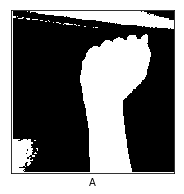

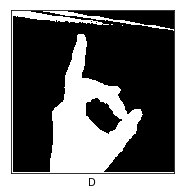

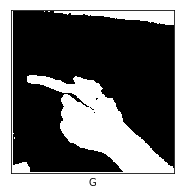

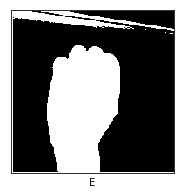

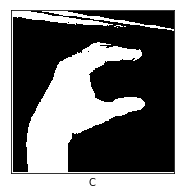

In [0]:
draw_images(get_thresh, test_images_names)

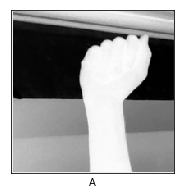

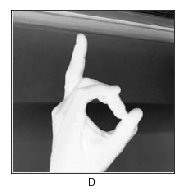

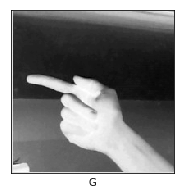

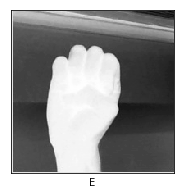

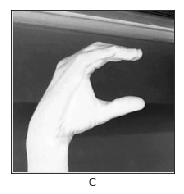

In [0]:
draw_images(get_gray, test_images_names)

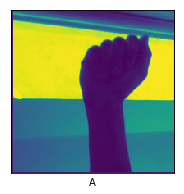

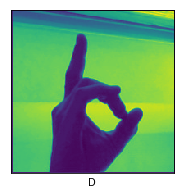

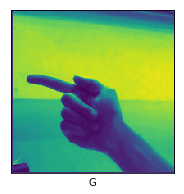

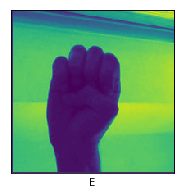

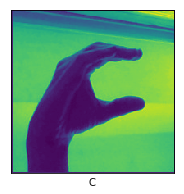

In [0]:
draw_images(get_gray, test_images_names, cmap=None)

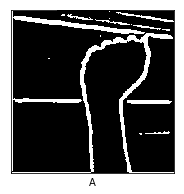

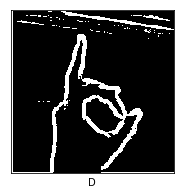

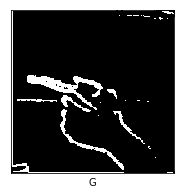

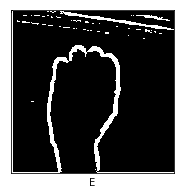

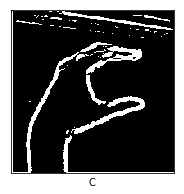

In [0]:
draw_images(get_adaptive_thresh, test_images_names)

In [0]:
from google.colab.patches import cv2_imshow

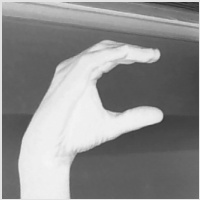

In [0]:
img_name = test_images_names[4]
img = cv2.imread(test_data_path + img_name)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow((~gray))

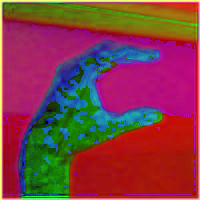

In [0]:
img = cv2.imread(test_data_path + img_name)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
cv2_imshow(hsv)

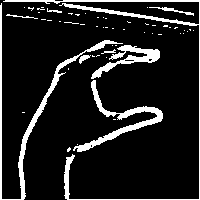

In [0]:
img_name = test_images_names[4]
img = cv2.imread(test_data_path + img_name)
img = get_adaptive_thresh(img)
cv2_imshow((~img))

# Proccess test Images

In [0]:
prep_data_test = 'prep_test/'
prep_gray = 'gray/'
prep_thresh = 'thresh/'
prep_adaptive_thresh = 'adaptive_thresh/'

In [0]:
for img_name in test_images_names:
    
    image = cv2.imread(test_data_path + img_name)
    
    gray = get_gray(image)
    
    thresh = get_thresh(image)

    adaptive_thresh = get_adaptive_thresh(image)
    
    cv2.imwrite(prep_data_test + prep_gray + img_name, ~gray)
    cv2.imwrite(prep_data_test + prep_thresh + img_name, ~thresh)
    cv2.imwrite(prep_data_test + prep_adaptive_thresh + img_name, ~adaptive_thresh)

# Prepare train data

In [11]:
prep_data_train = 'prep_train/'
train_data_path

'asl_alphabet_train/'

In [0]:
train_dirs_names = os.listdir(train_data_path)
train_dirs_names.sort()

In [0]:
train_images_count = []
for ndir in train_dirs_names:
  train_images_count.append(len(os.listdir(train_data_path + ndir)))
train_images_count

[3009,
 3000,
 3000,
 3000,
 3000,
 3010,
 3000,
 3000,
 3000,
 3000,
 3000,
 3010,
 3000,
 3000,
 3000,
 3000,
 3000,
 3020,
 3000,
 3010,
 3000,
 3010,
 3010,
 3000,
 3000,
 3000,
 3000,
 3000,
 3000]

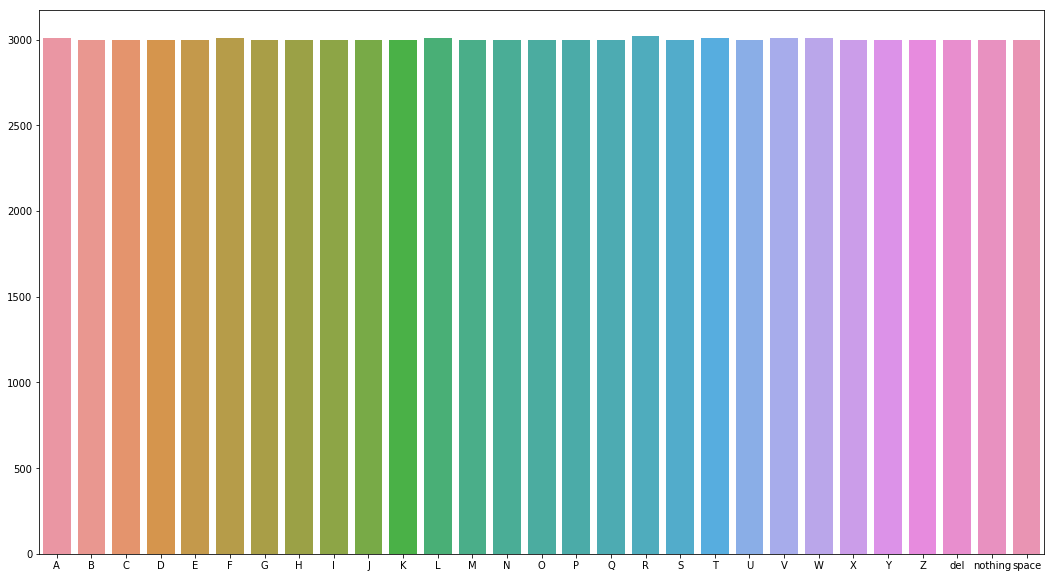

In [0]:
fig = plt.figure(figsize=(18,10))
sns.barplot(y = train_images_count, x=train_dirs_names)
plt.show()

In [0]:
import tensorflow as tf 
tf.test.gpu_device_name() 

'/device:GPU:0'

# Proccess train data

In [0]:
path_from = train_data_path
path_to = prep_data_train
for ndir in train_dirs_names[2:4]:
    nimgs = os.listdir(path_from + ndir)
    
    if not os.path.exists(path_to + prep_gray + ndir):
        os.mkdir(path_to + prep_gray + ndir)
        
    if not os.path.exists(path_to + prep_thresh + ndir):
        os.mkdir(path_to + prep_thresh + ndir)

    if not os.path.exists(path_to + prep_adaptive_thresh + ndir):
        os.mkdir(path_to + prep_adaptive_thresh + ndir)
    
    for nimg in nimgs:
        image = cv2.imread(path_from + ndir + '/' + nimg)

        if os.path.exists(path_to + prep_adaptive_thresh + ndir + '/' + nimg):
          continue
        
        gray = get_gray(image)
    
        thresh = get_thresh(image)

        adaptive_thresh = get_adaptive_thresh(image)

        cv2.imwrite(path_to + prep_gray + ndir + '/' + nimg, ~gray)
        cv2.imwrite(path_to + prep_thresh + ndir + '/' + nimg, ~thresh)
        cv2.imwrite(path_to + prep_adaptive_thresh + ndir + '/' + nimg, ~adaptive_thresh)

In [12]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
base_path = prep_data_train + 'abcd/'
dirs_with_train = os.listdir(base_path)

In [14]:
dirs_with_train

['gray_abcd']

In [0]:
for ndir in dirs_with_train:
    print(ndir + ": ")
    nlabels = os.listdir(base_path + ndir)
    for label in nlabels:
        print(" -" + label)
        nimgs = os.listdir(base_path + ndir + '/' + label)
        for nimg in nimgs:
            image = cv2.imread(base_path + ndir + '/' + label + '/' + nimg)
            resized = cv2.resize(image, (224, 224), interpolation = cv2.INTER_AREA)
            cv2.imwrite(base_path + ndir + '/' + label + '/' + nimg, resized)

gray_abcd: 
 -A
